<a href="https://colab.research.google.com/github/keilabcs/IN1024-2020-1-UFPE/blob/main/Exerci%CC%81cio_Processamento_Imagens_Coloridas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade Federal de Pernambuco
Centro de Informática - Cin

Programa de Pós-Graduação

IN1024 - Processamento de Imagens

Keila Barbosa Costa dos Santos


---

### **Exercício Prático** - Processamento de imagens coloridas



---

#### 1) Plote as faces do cubo de cores seguras do RGB.

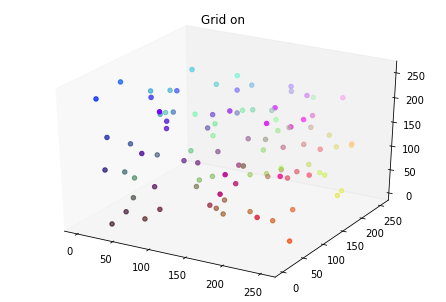

In [ ]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

RGBlist = [(random.randint(0,255), random.randint(0,255), random.randint(0,255)) for i in range(100)]
paleta=list(zip(*RGBlist))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(paleta[0],paleta[1],paleta[2], c=[(r[0]/255., r[1]/255., r[2]/255.) for r in RGBlist])
ax.grid(False)
ax.set_title('Grid on')
plt.savefig('image.png')

In [ ]:
# Carregando pacotes 
from scipy import misc
import cv2
from pylab import *
import time
from google.colab import drive
import matplotlib.pyplot as plt
import imageio
from skimage.color import *
import numpy as np
from PIL import Image
from matplotlib.colors import Normalize, ListedColormap, BoundaryNorm
from matplotlib.cm import ScalarMappable

In [ ]:
# Download Images
from google.colab import files
pbfile = files.upload()

Saving cubo.png to cubo (1).png


In [ ]:
!ls -la

total 180
drwxr-xr-x 1 root root  4096 Sep 20 06:48  .
drwxr-xr-x 1 root root  4096 Sep 20 04:59  ..
-rw-r--r-- 1 root root 26433 Sep 20 05:13  blah.png
drwxr-xr-x 1 root root  4096 Sep 16 16:29  .config
-rw-r--r-- 1 root root 58655 Sep 20 06:48 'cubo (1).png'
-rw-r--r-- 1 root root 48247 Sep 20 06:35  cubo.png
-rw-r--r-- 1 root root 26464 Sep 20 05:15  image.png
drwxr-xr-x 1 root root  4096 Sep 16 16:29  sample_data


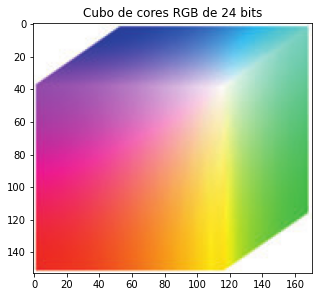

In [ ]:
# Lendo a imagem

img_cube = cv2.imread("cubo_rgb_24bits.png")
img_cube = cv2.cvtColor(img_cube, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (5,5))
plt.imshow(img_cube)
plt.title('Cubo de cores RGB de 24 bits')
plt.show()

Text(0.5, 1.0, '(R,G,0)')

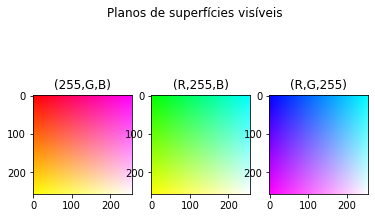

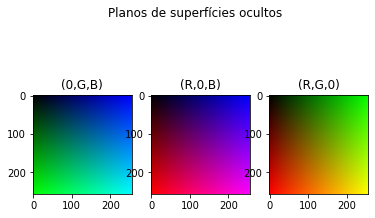

In [ ]:
# Faces do cubo

r_array = np.zeros((256,256,1), dtype=int)+127
g_array = np.zeros((256,256,1), dtype=int)
b_array = np.zeros((256,256,1), dtype=int)
for i in range(256):
  g_array[:,i,0] = i
  b_array[i,:,0] = i

x = np.ones((256,256,1), dtype=int)*255
y = g_array
z = b_array

fig,ax = plt.subplots(1,3)
plt.suptitle('Planos de superfícies visíveis')
ax[0].imshow(np.concatenate((x,z,y), axis=-1))
ax[0].set_title('(255,G,B)')
ax[1].imshow(np.concatenate((z,x,y), axis=-1))
ax[1].set_title('(R,255,B)')
ax[2].imshow(np.concatenate((z,y,x), axis=-1))
ax[2].set_title('(R,G,255)')

x = x*0
fig,ax = plt.subplots(1,3)
plt.suptitle('Planos de superfícies ocultos')
ax[0].imshow(np.concatenate((x,z,y), axis=-1))
ax[0].set_title('(0,G,B)')
ax[1].imshow(np.concatenate((z,x,y), axis=-1))
ax[1].set_title('(R,0,B)')
ax[2].imshow(np.concatenate((z,y,x), axis=-1))
ax[2].set_title('(R,G,0)')

Text(0.5, 1.0, 'Plano de corte transversal (127,G,B)')

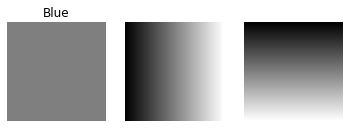

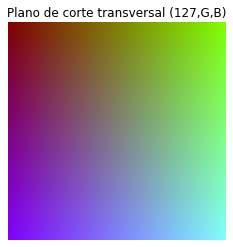

In [ ]:
# Faces do cubo

rgb_array = np.concatenate((r_array, g_array, b_array), axis=-1)

fig,ax=plt.subplots(1,3)
ax[0].imshow(np.squeeze(r_array), cmap='gray', vmin=0, vmax=255)
ax[0].axis('off')
ax[0].set_title('Red')
ax[1].imshow(np.squeeze(g_array), cmap='gray', vmin=0, vmax=255)
ax[1].axis('off')
ax[0].set_title('Green')
ax[2].imshow(np.squeeze(b_array), cmap='gray', vmin=0, vmax=255)
ax[2].axis('off')
ax[0].set_title('Blue')

plt.figure()
plt.imshow(rgb_array)
plt.axis('off')
plt.title('Plano de corte transversal (127,G,B)')

#### 2) Plote um plano de cor no esquema HSI de forma triangular e circular para um determinado I como foi feito para o cubo de cores RGB. 



Text(0.5, 1.0, 'Circular com I=0.90')

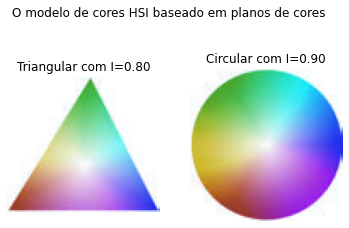

In [ ]:
img_triangle_hsi = cv2.imread("triangulo_hsi.png")
img_circle_hsi = cv2.imread("circulo_hsi.png")

fig,ax = plt.subplots(1,2)
plt.suptitle('O modelo de cores HSI baseado em planos de cores')
ax[0].imshow(img_triangle_hsi)
ax[0].axis('off')
ax[0].set_title('Triangular com I=0.80')
ax[1].imshow(img_circle_hsi)
ax[1].axis('off')
ax[1].set_title('Circular com I=0.90')

#### 3) Escreva uma função de conversão de esquema de cores HSI para RGB.

In [ ]:
# Conversão de HSI para RGB. 
# Para converter um pixel (H, S, I) na direção oposta a (R, G, B), consideramos os casos em que o ponto P está em uma das 
# seguintes regiões do triângulo de cromaticidade: 

# H <120° (vermelho-verde)
# 120° <H <240° (verde-azul)
# 240° <H <360° (azul-vermelho) 

# Conversão de HSI para RGB:

def f1(I,S): # I(1-S)
    return np.multiply(I, np.subtract(1,S))
  def f2(I,S,H): # I[1+(ScosH/cos(60-H))]
    r = math.pi/180
    a = np.multiply(S, np.cos(r*H)) # ScosH
    b = np.cos(r*np.subtract(60,H)) # cos(60-H)
    return np.multiply(I, np.add(1, np.divide(a,b)) )
  def f3(I,C1,C2): # 3I-(C1+C2)
    return np.subtract(3*I, np.add(C1,C2))

  def hsi_to_rgb(img):
    zmax = 255 # Valor máximo
    # Valor between[0,360], [0,1] and [0,1]
    H = img[:,:,0]
    S = np.divide(img[:,:,1],zmax,dtype=np.float)
    I = np.divide(img[:,:,2],zmax,dtype=np.float)

    R,G,B = np.ones(H.shape),np.ones(H.shape),np.ones(H.shape) # Os valores estarão entre [0,1]
    # for 0 <= H < 120
    B[(0<=H)&(H<120)] = f1(I[(0<=H)&(H<120)], S[(0<=H)&(H<120)])
    R[(0<=H)&(H<120)] = f2(I[(0<=H)&(H<120)], S[(0<=H)&(H<120)], H[(0<=H)&(H<120)])
    G[(0<=H)&(H<120)] = f3(I[(0<=H)&(H<120)], R[(0<=H)&(H<120)], B[(0<=H)&(H<120)])

    # for 120 <= H < 240
    H = np.subtract(H,120)
    R[(0<=H)&(H<120)] = f1(I[(0<=H)&(H<120)], S[(0<=H)&(H<120)])
    G[(0<=H)&(H<120)] = f2(I[(0<=H)&(H<120)], S[(0<=H)&(H<120)], H[(0<=H)&(H<120)])
    B[(0<=H)&(H<120)] = f3(I[(0<=H)&(H<120)], R[(0<=H)&(H<120)], G[(0<=H)&(H<120)])

    # for 240 <= H < 360
    H = np.subtract(H,120)
    G[(0<=H)&(H<120)] = f1(I[(0<=H)&(H<120)], S[(0<=H)&(H<120)])
    B[(0<=H)&(H<120)] = f2(I[(0<=H)&(H<120)], S[(0<=H)&(H<120)], H[(0<=H)&(H<120)])
    R[(0<=H)&(H<120)] = f3(I[(0<=H)&(H<120)], G[(0<=H)&(H<120)], B[(0<=H)&(H<120)])

    return np.dstack( ((zmax*R) , (zmax*G) , (zmax*B)) ) # Valores entre [0,255]